In [2]:
import pandas as pd

sample_info = pd.read_csv("/Users/edeneldar/Library/CloudStorage/GoogleDrive-edenede2@gmail.com/My Drive/ROSMAP_Data/RNAseq_RISK_BrainRegions_STasaki/data/sample_info.tsv", sep="\t")
pheno_df = pd.read_excel("/Users/edeneldar/Library/CloudStorage/GoogleDrive-edenede2@gmail.com/My Drive/ROSMAP_Data/MetaData/files/dataset_1593_cross-sectional_08-13-2025.xlsx")


/opt/anaconda3/envs/new_base/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
pheno_df.columns

Index(['projid', 'study', 'scaled_to', 'apoe_genotype', 'age_first_ad_dx',
       'cogdx', 'age_bl', 'age_death', 'died', 'educ', 'marital_now_bl',
       'msex', 'race7', 'spanish', 'alcohol_g_bl', 'ldai_bl', 'smoking_bl',
       'cancer_bl', 'headinjrloc_bl', 'med_con_sum_bl', 'thyroid_bl',
       'a_score_st4', 'ad_adnc', 'adnc', 'b_score', 'braaksc', 'c_score',
       'ceradsc', 'gpath', 'pmi', 'amylsqrt_est_8reg', 'hip_scl_yn_mid',
       'lewydx_st4', 'tangsqrt_est_8reg', 'tdp_st4', 'arteriol_scler',
       'caa_4gp', 'cvda_4gp2', 'ci_num2_gct', 'ci_num2_mct', 'early_hh_ses',
       'income_bl'],
      dtype='object')

In [4]:
sample_info.columns

Index(['IID', 'FID', 'SAMPLE.ID', 'RegionName', 'Batch', 'TOTAL_READS',
       'PF_READS', 'PCT_PF_READS', 'PF_NOISE_READS', 'PF_READS_ALIGNED',
       ...
       'Center', 'DateSampleExtracted', 'msex', 'cnt.ratio.mRNA',
       'mt.ratio.mRNA', 'cnt.ratio.premRNA', 'mt.ratio.premRNA', 'Project',
       'Projid', 'pmi'],
      dtype='object', length=120)

In [8]:
samples_by_phenotype = pd.merge(sample_info, pheno_df, left_on="IID", right_on="projid", how="left")

In [9]:
samples_by_phenotype = samples_by_phenotype[["IID", "FID", "RegionName", "Batch", "projid", "cogdx", "SAMPLE.ID"]]

In [17]:
# Count distinct IID that have 3 or more samples and are not missing in the projid column
have_proj_id = samples_by_phenotype['projid'].notnull()
projid_1_5 = have_proj_id & (samples_by_phenotype['cogdx'].isin([1, 2, 3, 4, 5]))
distinct_iid_count = samples_by_phenotype[projid_1_5]['IID'].value_counts()
filtered_iid3 = distinct_iid_count[distinct_iid_count >= 3]

In [18]:
filtered_iid3

IID
246264      3
38131115    3
37178462    3
37251992    3
37393077    3
           ..
10557081    3
20537160    3
10551157    3
20506587    3
20559562    3
Name: count, Length: 450, dtype: int64

In [11]:
# Count distinct IID that have 3 or more samples
distinct_iid_count = samples_by_phenotype['IID'].value_counts()
filtered_iid = distinct_iid_count[distinct_iid_count >= 3]

In [12]:
filtered_iid

IID
246264      3
39125441    3
37393077    3
37436329    3
37439930    3
           ..
20611993    3
20569910    3
10551157    3
20561642    3
9391376     3
Name: count, Length: 464, dtype: int64

In [13]:
# Count distinct IID that have 3 or more samples and are not missing in the projid column
filtered_iid2 = filtered_iid[filtered_iid.index.notnull()]

In [14]:
filtered_iid2

IID
246264      3
39125441    3
37393077    3
37436329    3
37439930    3
           ..
20611993    3
20569910    3
10551157    3
20561642    3
9391376     3
Name: count, Length: 464, dtype: int64

Visualizations of Modules from ROSMAP

/var/folders/5g/7gzv8rg14tv7prkqk0v2f3280000gn/T/ipykernel_8914/2323586878.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clusters[c] = pd.to_numeric(clusters[c], errors='coerce').fillna(0)


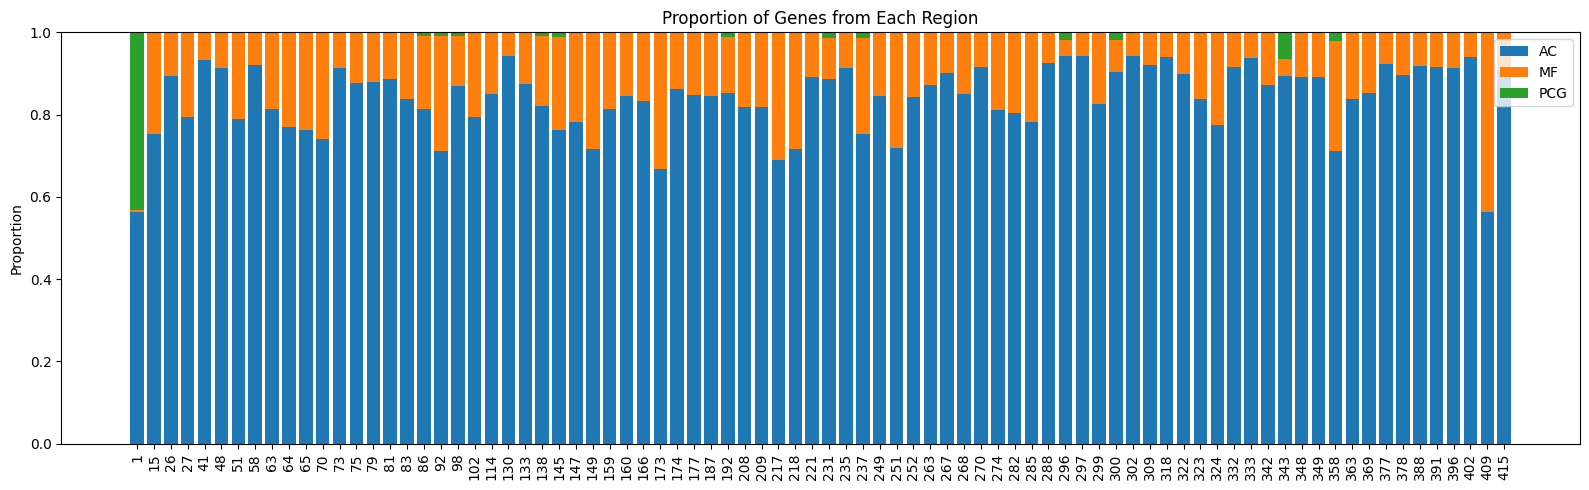

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import plotly.express as px
import plotly.graph_objects as go

cluster_details_full = pd.read_csv("/Users/edeneldar/Library/CloudStorage/GoogleDrive-edenede2@gmail.com/Shared drives/is-SomekhLab/inter_tissue_coexpression/proccessed_data/ROSMAP_full_outputs/xwgcna_rosmap_autobeta_run4_Cluster_details.tsv", sep="\t")

cluster_details_full_ct = cluster_details_full[cluster_details_full['Cluster Type'] == 'CT']

clusters = cluster_details_full_ct[["Cluster ID", "AC", "MF", "PCG"]]

for c in ["AC", "MF", "PCG"]:
    clusters[c] = pd.to_numeric(clusters[c], errors='coerce').fillna(0)

clusters = clusters.sort_values(by="Cluster ID").reset_index(drop=True)

counts = clusters[["AC", "MF", "PCG"]]
props = counts.div(counts.sum(axis=1).replace(0, np.nan), axis=0).fillna(0)
props.insert(0, 'Cluster ID', clusters['Cluster ID'].astype(int).values)

fig, ax = plt.subplots(figsize=(16,5))
x = np.arange(len(props))
ax.bar(x, props['AC'], label='AC')
ax.bar(x, props['MF'], bottom=props['AC'], label='MF')
ax.bar(x, props['PCG'], bottom=props["AC"] + props["MF"], label='PCG')
ax.set_xticks(x)
ax.set_xticklabels(props['Cluster ID'].astype(str).tolist(), rotation=90)   
ax.set_ylabel('Proportion')
ax.set_title('Proportion of Genes from Each Region')
ax.legend(loc='upper right')
fig.tight_layout()
fig.savefig("rosmap_gene_proportions.png", dpi=220, bbox_inches='tight')
plt.show()

/var/folders/5g/7gzv8rg14tv7prkqk0v2f3280000gn/T/ipykernel_8914/525028718.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clusters[c] = pd.to_numeric(clusters[c], errors='coerce').fillna(0)


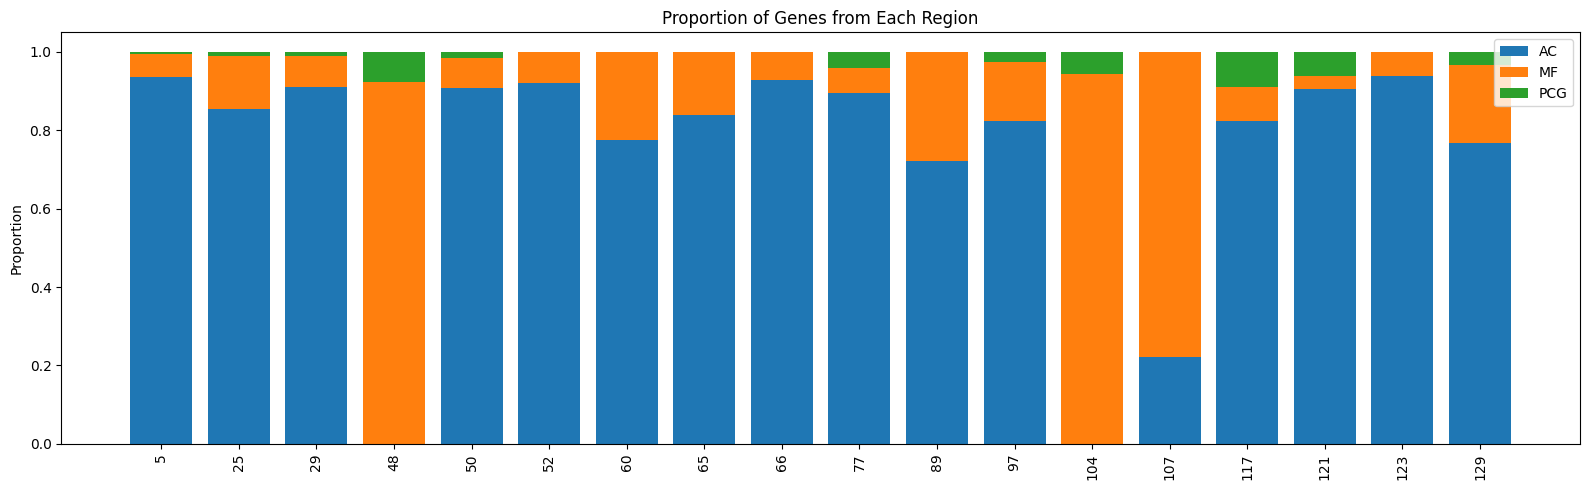

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import plotly.express as px
import plotly.graph_objects as go

cluster_details_full = pd.read_csv("/Users/edeneldar/Library/CloudStorage/GoogleDrive-edenede2@gmail.com/Shared drives/is-SomekhLab/inter_tissue_coexpression/proccessed_data/ROSMAP_full_outputs/xwgcna_rosmap_autobeta_run5_Cluster_details.tsv", sep="\t")

cluster_details_full_ct = cluster_details_full[cluster_details_full['Cluster Type'] == 'CT']

clusters = cluster_details_full_ct[["Cluster ID", "AC", "MF", "PCG"]]

for c in ["AC", "MF", "PCG"]:
    clusters[c] = pd.to_numeric(clusters[c], errors='coerce').fillna(0)

clusters = clusters.sort_values(by="Cluster ID").reset_index(drop=True)

counts = clusters[["AC", "MF", "PCG"]]
props = counts.div(counts.sum(axis=1).replace(0, np.nan), axis=0).fillna(0)
props.insert(0, 'Cluster ID', clusters['Cluster ID'].astype(int).values)

fig, ax = plt.subplots(figsize=(16,5))
x = np.arange(len(props))
ax.bar(x, props['AC'], label='AC')
ax.bar(x, props['MF'], bottom=props['AC'], label='MF')
ax.bar(x, props['PCG'], bottom=props["AC"] + props["MF"], label='PCG')
ax.set_xticks(x)
ax.set_xticklabels(props['Cluster ID'].astype(str).tolist(), rotation=90)   
ax.set_ylabel('Proportion')
ax.set_title('Proportion of Genes from Each Region')
ax.legend(loc='upper right')
fig.tight_layout()
fig.savefig("rosmap_gene_top5000_proportions.png", dpi=220, bbox_inches='tight')
plt.show()

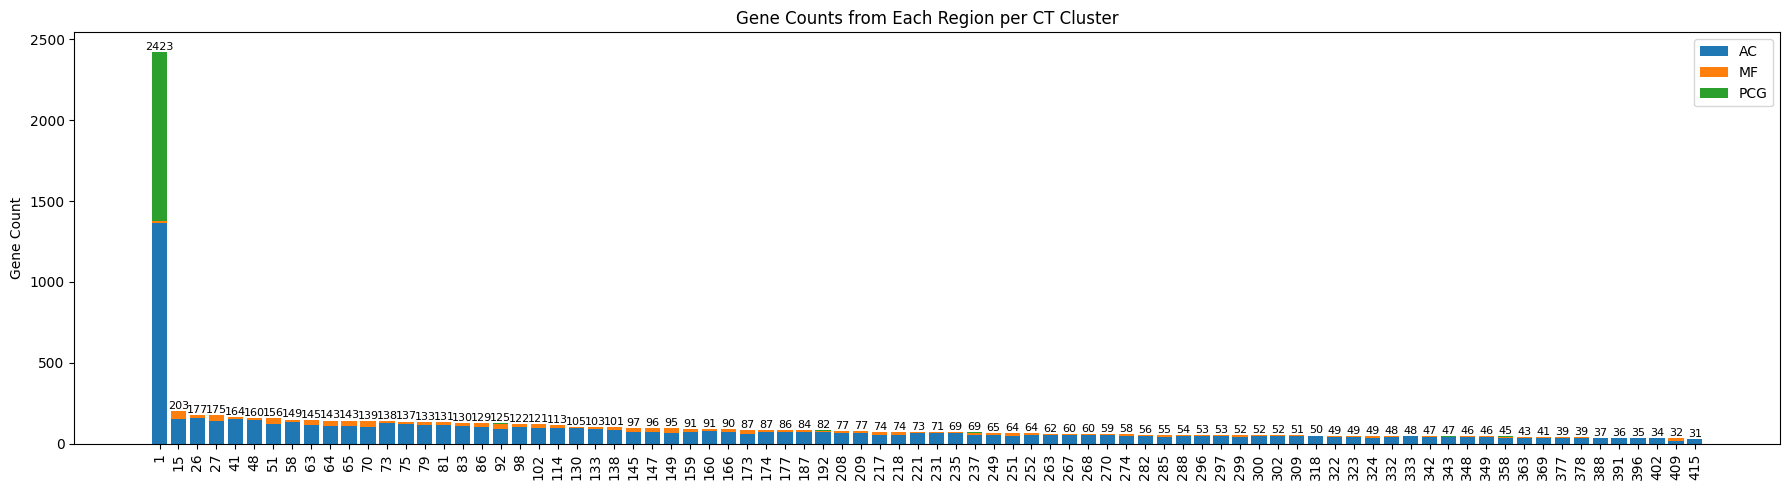

In [18]:

cluster_details_full = pd.read_csv(
    "/Users/edeneldar/Library/CloudStorage/GoogleDrive-edenede2@gmail.com/Shared drives/is-SomekhLab/inter_tissue_coexpression/proccessed_data/ROSMAP_full_outputs/xwgcna_rosmap_autobeta_run4_Cluster_details.tsv",
    sep="\t"
)

cluster_details_full_ct = cluster_details_full[cluster_details_full['Cluster Type'] == 'CT']
clusters = cluster_details_full_ct[["Cluster ID", "AC", "MF", "PCG"]].copy()

for c in ["AC", "MF", "PCG"]:
    clusters.loc[:, c] = pd.to_numeric(clusters[c], errors='coerce').fillna(0).astype(int)

clusters = clusters.sort_values(by="Cluster ID").reset_index(drop=True)

counts = clusters[["AC", "MF", "PCG"]].copy()

fig, ax = plt.subplots(figsize=(18, 5))
x = np.arange(len(clusters))
bar_ac = ax.bar(x, counts["AC"], label="AC")
bar_mf = ax.bar(x, counts["MF"], bottom=counts["AC"], label="MF")
bar_pcg = ax.bar(x, counts["PCG"], bottom=counts["AC"] + counts["MF"], label="PCG")
totals = counts.sum(axis=1).values
for xi, total in zip(x, totals):
    ax.text(xi, total + 0.5, str(int(total)), ha="center", va="bottom", fontsize=8)
ax.set_xticks(x)
ax.set_xticklabels(clusters["Cluster ID"].astype(str).tolist(), rotation=90)
ax.set_ylabel("Gene Count")
ax.set_title("Gene Counts from Each Region per CT Cluster")
ax.legend(loc="upper right")
fig.tight_layout()
fig.savefig("rosmap_gene_counts.png", dpi=220, bbox_inches="tight")
plt.show()

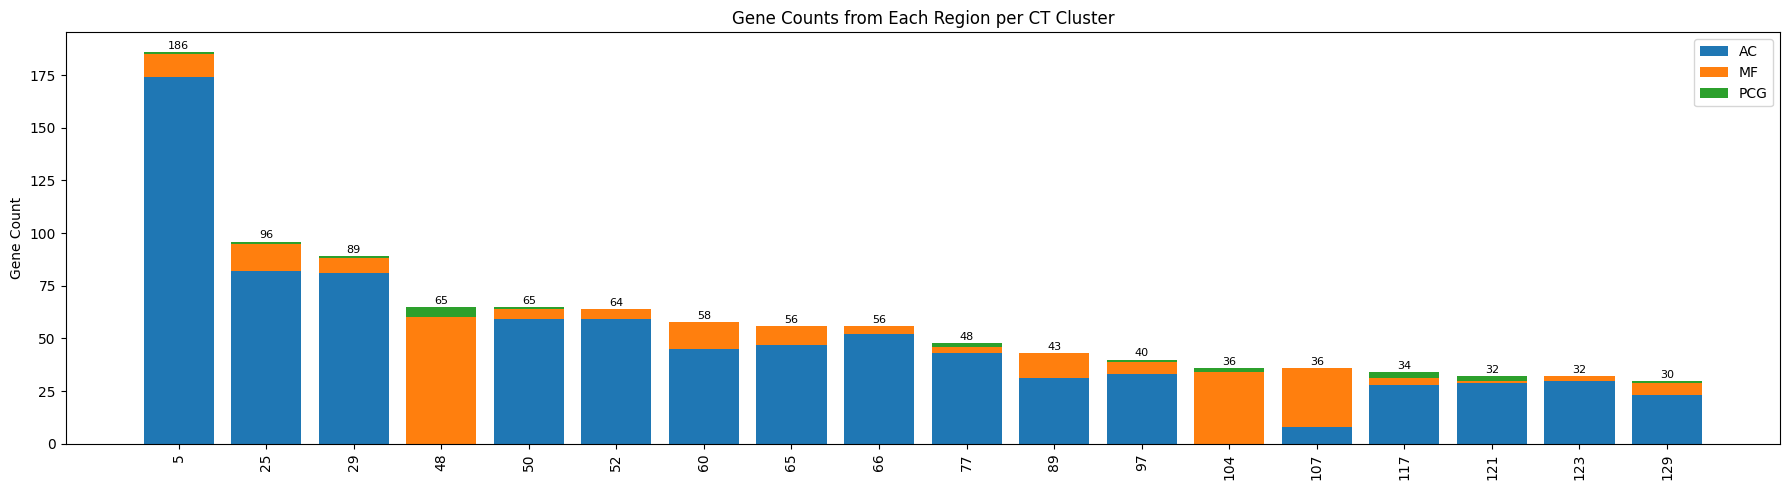

In [19]:

cluster_details_5000 = pd.read_csv(
    "/Users/edeneldar/Library/CloudStorage/GoogleDrive-edenede2@gmail.com/Shared drives/is-SomekhLab/inter_tissue_coexpression/proccessed_data/ROSMAP_full_outputs/xwgcna_rosmap_autobeta_run5_Cluster_details.tsv",
    sep="\t"
)

cluster_details_5000_ct = cluster_details_5000[cluster_details_5000['Cluster Type'] == 'CT']
clusters = cluster_details_5000_ct[["Cluster ID", "AC", "MF", "PCG"]].copy()

for c in ["AC", "MF", "PCG"]:
    clusters.loc[:, c] = pd.to_numeric(clusters[c], errors='coerce').fillna(0).astype(int)

clusters = clusters.sort_values(by="Cluster ID").reset_index(drop=True)

counts = clusters[["AC", "MF", "PCG"]].copy()

fig, ax = plt.subplots(figsize=(18, 5))
x = np.arange(len(clusters))
bar_ac = ax.bar(x, counts["AC"], label="AC")
bar_mf = ax.bar(x, counts["MF"], bottom=counts["AC"], label="MF")
bar_pcg = ax.bar(x, counts["PCG"], bottom=counts["AC"] + counts["MF"], label="PCG")
totals = counts.sum(axis=1).values
for xi, total in zip(x, totals):
    ax.text(xi, total + 0.5, str(int(total)), ha="center", va="bottom", fontsize=8)
ax.set_xticks(x)
ax.set_xticklabels(clusters["Cluster ID"].astype(str).tolist(), rotation=90)
ax.set_ylabel("Gene Count")
ax.set_title("Gene Counts from Each Region per CT Cluster")
ax.legend(loc="upper right")
fig.tight_layout()
fig.savefig("rosmap_gene_counts_top5000.png", dpi=220, bbox_inches="tight")
plt.show()

GO Visualizations

In [25]:
GO_PMAT_TSV_FULL  = f"/Users/edeneldar/CoExpression_ReProduction/go_pmat_rosmap_full.tsv"   
GO_PMAT_TSV_TOP5000 = f"/Users/edeneldar/CoExpression_ReProduction/go_pmat_rosmap_5000.tsv"

GO_BP_CSV_FULL = f"/Users/edeneldar/CoExpression_ReProduction/go_bp_tab_rosmap_full.csv"
GO_BP_CSV_TOP5000 = f"/Users/edeneldar/CoExpression_ReProduction/go_bp_tab_rosmap_5000.csv"
GO_CC_CSV_FULL = f"/Users/edeneldar/CoExpression_ReProduction/go_cc_tab_rosmap_full.csv"
GO_CC_CSV_TOP5000 = f"/Users/edeneldar/CoExpression_ReProduction/go_cc_tab_rosmap_5000.csv"
GO_MF_CSV_FULL = f"/Users/edeneldar/CoExpression_ReProduction/go_mf_tab_rosmap_full.csv"
GO_MF_CSV_TOP5000 = f"/Users/edeneldar/CoExpression_ReProduction/go_mf_tab_rosmap_5000.csv"
CAP = 10.0


In [13]:
def build_go_id_to_name(bp_csv=GO_BP_CSV_FULL, cc_csv=GO_CC_CSV_FULL, mf_csv=GO_MF_CSV_FULL):
    def _read(path):
        try:
            df = pd.read_csv(path, engine="python", on_bad_lines="skip")
        except Exception:
            df = pd.read_csv(path)
        id_col = None; name_col = None
        for c in df.columns:
            low = c.strip().lower()
            if low in {"termid", "id", "go_id", "goid"}:
                id_col = c
            if low in {"termname", "description", "name"}:
                name_col = c
        if id_col is None and "termID" in df.columns: id_col = "termID"
        if name_col is None and "termName" in df.columns: name_col = "termName"
        if id_col and name_col:
            return df[[id_col, name_col]].dropna().drop_duplicates().rename(columns={id_col:"GO", name_col:"Term"})
        return pd.DataFrame(columns=["GO","Term"])
    maps = pd.concat([_read(bp_csv), _read(cc_csv), _read(mf_csv)], ignore_index=True).drop_duplicates()
    return dict(zip(maps["GO"], maps["Term"]))

go_name = build_go_id_to_name()


In [22]:
# קריאה
pmat = pd.read_csv(GO_PMAT_TSV_FULL, sep="\t")
pmat_ct = pmat[pmat.index.isin(cluster_details_full_ct["Cluster ID"])]

# אם אין עמודת 'module' מפורשת—ה-index כבר המודולים:
if "module" in pmat_ct.columns:
    pmat_ct = pmat_ct.set_index("module")

pmat_ct = pmat_ct.sort_index()
pmat_ct = pmat_ct.apply(pd.to_numeric, errors="coerce")  # לוודא נומרי

# פרמטרים לבחירה
N_PER_MODULE = 4     # כמה טרמינים הכי מובהקים לכל מודול
MAX_TERMS    = 60    # תקרה גלובלית למספר שורות בהיטמאפ
P_THRESH     = 0.05  # סף מובהקות

# בחירת טרמינים
candidate = set()
for mod, row in pmat_ct.iterrows():
    sig = row[row < P_THRESH].nsmallest(N_PER_MODULE)
    if sig.empty:
        sig = row.nsmallest(N_PER_MODULE)
    candidate.update(sig.index.tolist())

terms = list(candidate)
if len(terms) > MAX_TERMS:
    keep = pmat_ct[terms].min(axis=0).nsmallest(MAX_TERMS).index.tolist()
    terms = keep

# מטריצות עזר
sub_p = pmat_ct[terms].copy()                           # מודולים × טרמינים (GO IDs)
# להכין ערכים ל- -log10: p=0 → ערך זעיר; p=1 → NaN (אין העשרה)
sub_p = sub_p.replace(1, np.nan)
sub_p = sub_p.replace(0, np.nextafter(0, 1))
neglog = -np.log10(sub_p)

# להפוך כך ששורות=טרמינים, עמודות=מודולים
mat = neglog.T.copy()
# מיון שורות: לפי המודול שבו הטרמין חזק ביותר, ואז לפי העוצמה
peak_mod = mat.idxmax(axis=1)
peak_val = mat.max(axis=1)
mat["__peak_mod__"] = peak_mod
mat["__peak_val__"] = peak_val
mat = mat.sort_values(by=["__peak_mod__", "__peak_val__"], ascending=[True, False]).drop(columns=["__peak_mod__", "__peak_val__"])

# תוויות יפות: "GO:XXXX — Term name"
def pretty_label(go_id: str, max_len=80):
    name = go_name.get(go_id, "")
    label = f"{go_id} — {name}"
    return label if len(label) <= max_len else label[:max_len-1] + "…"

row_labels = [pretty_label(go) for go in mat.index]

# נשמור ליתר שימוש
mat.to_csv("go_enrichment_selected_matrix_full.csv")


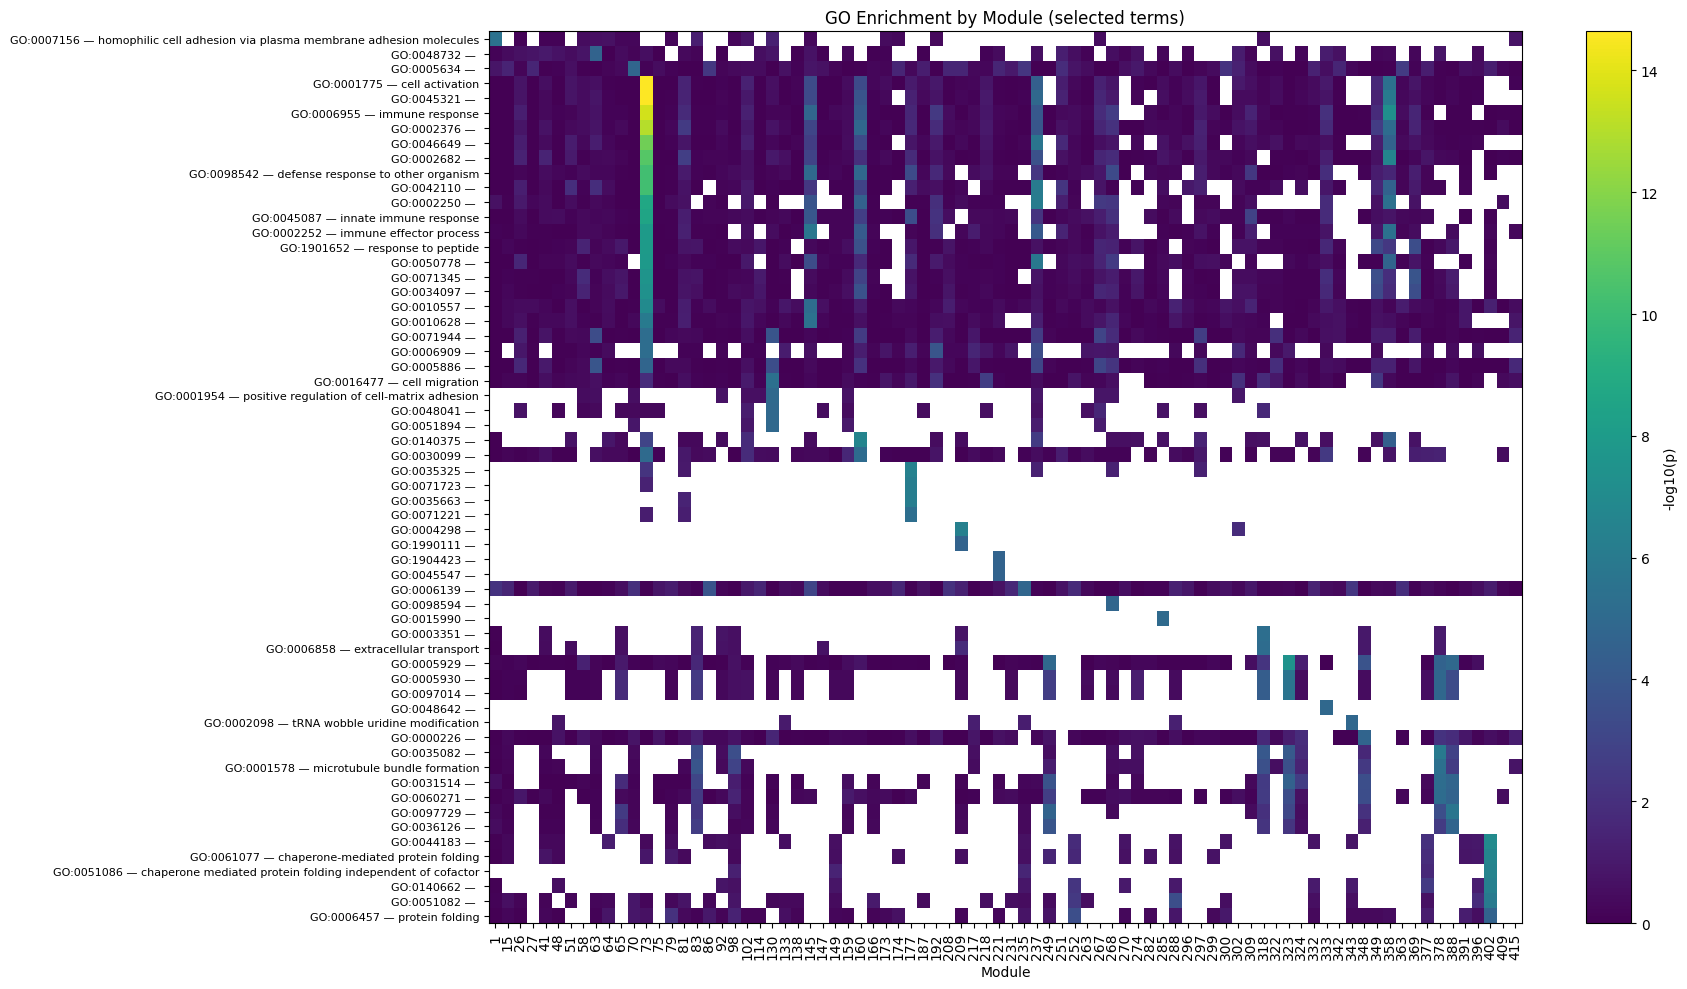

In [23]:
# Colormap שמציג NaN בלבן
cmap = plt.cm.viridis.copy()
cmap.set_bad(color="white")

fig, ax = plt.subplots(figsize=(18, 10))
im = ax.imshow(mat.values, aspect="auto", interpolation="nearest", cmap=cmap)
cbar = fig.colorbar(im, ax=ax, label="-log10(p)")
ax.set_yticks(range(len(row_labels)))
ax.set_yticklabels(row_labels, fontsize=8)
ax.set_xticks(range(mat.shape[1]))
ax.set_xticklabels(mat.columns.astype(str), rotation=90)
ax.set_xlabel("Module")
ax.set_title("GO Enrichment by Module (selected terms)")
fig.tight_layout()
fig.savefig("go_enrichment_heatmap_full.png", dpi=220, bbox_inches="tight")
plt.show()


In [24]:
# נחשב גם p (לצורך הטול־טיפ) מתוך המטריצה המקורית sub_p (טרמינים × מודולים)
p_for_hover = sub_p.T.loc[mat.index, mat.columns]  # אותם סדרי שורות/עמודות

hover_text = []
for i, term in enumerate(mat.index):
    row = []
    for j, mod in enumerate(mat.columns):
        val = mat.iloc[i, j]
        p   = p_for_hover.iloc[i, j]
        if pd.isna(val):
            row.append(f"Term: {pretty_label(term)}<br>Module: {mod}<br>p = 1.0 (no enrichment)")
        else:
            row.append(f"Term: {pretty_label(term)}<br>Module: {mod}<br>-log10(p) = {val:.2f}<br>p ≈ {10**(-val):.2e}")
    hover_text.append(row)

fig = go.Figure(data=go.Heatmap(
    z=mat.values,
    x=[str(c) for c in mat.columns],
    y=row_labels,
    text=hover_text,
    hoverinfo="text",
    coloraxis="coloraxis",
))
fig.update_layout(
    title="GO Enrichment by Module (selected terms)",
    xaxis_title="Module",
    yaxis_title="GO term",
    coloraxis=dict(colorbar=dict(title="-log10(p)")),
    height=700
)
fig.show()


In [34]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ----- נתיבים (עדכן לפי הצורך) -----
DATA_DIR = "."

# GO (full)
GO_PMAT_TSV = f"{DATA_DIR}/go_pmat_rosmap_full.tsv"
GO_BP_CSV   = f"{DATA_DIR}/go_bp_tab_rosmap_full.csv"
GO_CC_CSV   = f"{DATA_DIR}/go_cc_tab_rosmap_full.csv"
GO_MF_CSV   = f"{DATA_DIR}/go_mf_tab_rosmap_full.csv"

# KEGG (full)
KEGG_LONG_CSV = f"{DATA_DIR}/kegg_rosmap_full.csv"

MODULES_DETAILS = f"/Users/edeneldar/Library/CloudStorage/GoogleDrive-edenede2@gmail.com/Shared drives/is-SomekhLab/inter_tissue_coexpression/proccessed_data/ROSMAP_full_outputs/xwgcna_rosmap_autobeta_run4_Cluster_details.tsv"
# פלט
OUT_DIR = Path(DATA_DIR) / "plots_signed_heatmaps"
OUT_DIR.mkdir(parents=True, exist_ok=True)

# ----- עזר: קריאה סלחנית -----
def read_csv_any(path, sep=None):
    try:
        if sep is not None:
            return pd.read_csv(path, sep=sep)
        return pd.read_csv(path)
    except Exception:
        try:
            return pd.read_csv(path, engine="python", on_bad_lines="skip")
        except Exception as e:
            raise e

# ----- עזר: ציור היטמאפ חתום (±CAP) ושמירה -----
def plot_signed_heatmap(mat_signed_T, title, out_png, cap=10.0, ylabels=None):
    """
    mat_signed_T: DataFrame (rows=terms, cols=modules) של signed -log10(p) אחרי מיון.
    """
    fig, ax = plt.subplots(figsize=(18, 10))
    # אם תרצה מפה דו-קוטבית קלילה: בטל את ההערה הבאה
    # cmap = plt.cm.coolwarm
    # אחרת, ישתמש בברירת המחדל של Matplotlib
    im = ax.imshow(mat_signed_T.values, aspect="auto", interpolation="nearest",
                   vmin=-cap, vmax=cap)  # , cmap=cmap)
    cbar = fig.colorbar(im, ax=ax, label="signed −log10(p)  (under ⟵ 0 ⟶ over)")
    ax.set_yticks(range(mat_signed_T.shape[0]))
    ax.set_yticklabels(ylabels if ylabels is not None else mat_signed_T.index.tolist(), fontsize=8)
    ax.set_xticks(range(mat_signed_T.shape[1]))
    ax.set_xticklabels(mat_signed_T.columns.astype(str), rotation=90)
    ax.set_xlabel("Module")
    ax.set_title(title)
    fig.tight_layout()
    fig.savefig(out_png, dpi=220, bbox_inches="tight")
    plt.show()
    return fig


In [93]:
# ---------- GO: בניית כיוון וסריקת p-matrix ----------
def _read_go_long_table(path):
    df = read_csv_any(path, sep=None)
    # טיפוסי עמודות מקובלים בטבלאות GO:
    # module, modSize (k), nModGenesInTerm (x), bkgrTermSize (m), bkgrModSize (N),
    # fracOfBkgrTermSize (~ m/N), fracOfBkgrModSize (~ k/N), termID (GO:XXXX), termName...
    cols = {c.lower(): c for c in df.columns}
    get = lambda *cand: next((cols[c] for c in cand if c in cols), None)
    return df.rename(columns={ 
        get("module","cluster","cluster id","cluster_id"): "module",
        get("nmodgenesinterm","overlap","k.in.term","k_term"): "x",
        get("modsize","k","module_size"): "k",
        get("bkgrtermsize","m","term_size"): "m",
        get("bkgrmodsize","n","background_size","bgsize"): "N",
        get("fracofbkgrtermsize"): "m_over_N",
        get("fracofbkgrmodsize"): "k_over_N",
        get("termid","id","go_id","goid"): "termID",
        get("termname","description","name"): "termName"
    })

def _concat_go_longs(bp_csv, cc_csv, mf_csv):
    frames = []
    for p in [bp_csv, cc_csv, mf_csv]:
        try:
            frames.append(_read_go_long_table(p))
        except Exception:
            pass
    long = pd.concat(frames, ignore_index=True).dropna(subset=["module","termID"])
    # הבטחת טיפוסים
    long["module"] = pd.to_numeric(long["module"], errors="coerce")
    for c in ["x","k","m","N","m_over_N","k_over_N"]:
        if c in long.columns:
            long[c] = pd.to_numeric(long[c], errors="coerce")
    long = long.dropna(subset=["module"])
    long["termID"] = long["termID"].astype(str)
    return long

def _go_direction_map(long_df):
    # נסה לגזור N אם חסר
    if "N" not in long_df.columns or long_df["N"].isna().all():
        N_est1 = np.where(long_df["m"].notna() & long_df["m_over_N"].notna() & (long_df["m_over_N"]>0),
                          long_df["m"]/long_df["m_over_N"], np.nan)
        N_est2 = np.where(long_df["k"].notna() & long_df["k_over_N"].notna() & (long_df["k_over_N"]>0),
                          long_df["k"]/long_df["k_over_N"], np.nan)
        long_df = long_df.copy()
        long_df["N_est"] = pd.Series(N_est1).fillna(pd.Series(N_est2))
        N_vec = long_df["N_est"]
    else:
        N_vec = long_df["N"]

    # חישוב סימן לפי השוואת פרופורציות
    obs_prop = (long_df["x"] / long_df["k"]).astype(float)
    bg_prop  = (long_df["m"] / N_vec).astype(float)
    sign = np.sign(obs_prop - bg_prop)
    # בנה מילון {(module, termID) -> sign}
    dir_map = {(int(mod), term): s for mod, term, s in zip(long_df["module"], long_df["termID"], sign)
               if pd.notna(mod) and pd.notna(s)}
    return dir_map

def _go_id_to_name_map(bp_csv, cc_csv, mf_csv):
    frames = []
    for path in [bp_csv, cc_csv, mf_csv]:
        try:
            df = read_csv_any(path, sep=None)
        except Exception:
            continue
        cols = {c.lower(): c for c in df.columns}
        id_col  = next((cols[c] for c in ["termid","id","go_id","goid"] if c in cols), None)
        name_col= next((cols[c] for c in ["termname","description","name"] if c in cols), None)
        if id_col and name_col:
            frames.append(df[[id_col, name_col]].rename(columns={id_col:"GO", name_col:"Term"}))
    if not frames:
        return {}
    mapping = pd.concat(frames, ignore_index=True).dropna().drop_duplicates()
    return dict(zip(mapping["GO"].astype(str), mapping["Term"].astype(str)))

def build_go_signed_matrix(
    go_pmat_tsv=GO_PMAT_TSV,
    go_bp_csv=GO_BP_CSV, go_cc_csv=GO_CC_CSV, go_mf_csv=GO_MF_CSV, modules_details=MODULES_DETAILS,
    cap=10.0, selection="global_top", K_GLOBAL=60, N_PER_MODULE=4, P_THRESH=0.05, clean_TS=True
):
    # 1) p-matrix
    pmat = read_csv_any(go_pmat_tsv, sep="\t")
    if clean_TS:
        mod_details = read_csv_any(modules_details, sep="\t")
        print(mod_details.columns)
        pmat = pmat[pmat.index.isin(mod_details[mod_details["Cluster Type"] == "CT"]["Cluster ID"])]
    if "module" in pmat.columns:
        pmat = pmat.set_index("module")
    pmat.index = pd.to_numeric(pmat.index, errors="coerce")
    pmat = pmat.sort_index()
    pmat = pmat.apply(pd.to_numeric, errors="coerce")
    pmat.columns = pmat.columns.astype(str)

    # 2) כיוון האפקט מתוך טבלאות ארוכות BP/CC/MF
    long_df = _concat_go_longs(go_bp_csv, go_cc_csv, go_mf_csv)
    dir_map = _go_direction_map(long_df)

    # 3) בחירת מונחים
    if selection == "global_top":
        terms = pmat.min(axis=0).nsmallest(K_GLOBAL).index.tolist()
    elif selection == "per_module":
        terms = set()
        for mod, row in pmat.iterrows():
            sig = row[row < P_THRESH].nsmallest(N_PER_MODULE)
            if sig.empty:
                sig = row.nsmallest(N_PER_MODULE)
            terms.update(sig.index.tolist())
        terms = list(terms)
        # אם יצא גדול מאוד—נחתוך ל-K_GLOBAL הכי טובים גלובלית
        if len(terms) > K_GLOBAL:
            terms = pmat[terms].min(axis=0).nsmallest(K_GLOBAL).index.tolist()
    else:
        raise ValueError("selection must be 'global_top' or 'per_module'.")

    sub = pmat[terms].copy()

    # 4) בניית ציון חתום: sign * min(-log10(p), cap)
    EPS = np.nextafter(0, 1)
    signed = sub.copy()
    for c in signed.columns:
        p = signed[c].astype(float)
        v = -np.log10(np.clip(p, EPS, 1.0))
        v = np.minimum(v, cap)
        s = [dir_map.get((int(mod), str(c)), 0.0) for mod in signed.index]
        signed[c] = v * np.array(s)

    # 5) מיון שורות (טרמינים) לפי מודול שיא ואז לפי עוצמה
    mat_T = signed.T
    peak_mod = mat_T.idxmax(axis=1)
    peak_val = mat_T.max(axis=1)
    mat_T["__peak_mod__"] = peak_mod
    mat_T["__peak_val__"] = peak_val
    mat_T = mat_T.sort_values(by=["__peak_mod__", "__peak_val__"], ascending=[True, False])
    mat_T = mat_T.drop(columns=["__peak_mod__", "__peak_val__"])

    # 6) תוויות יפות "GO — Term"
    id2name = _go_id_to_name_map(go_bp_csv, go_cc_csv, go_mf_csv)
    ylabels = [f"{go} — {id2name.get(go, '')}".strip(" —") for go in mat_T.index]

    return mat_T, ylabels


In [104]:
import numpy as np
import pandas as pd

def build_go_bp_signed_matrix(
    go_pmat_tsv,                 # למשל: "/mnt/data/go_pmat_rosmap_full.tsv"
    go_bp_csv,                   # למשל: "/mnt/data/go_bp_tab_rosmap_full.csv"
    modules_details=None,        # אופציונלי: קובץ פרטי מודולים עם "Cluster ID" ו-"Cluster Type"
    clean_TS=True,               # אם True – מסנן ל-CT לפי modules_details
    cap=10.0,                    # תקרת |−log10(p)|
    selection="global_top",      # "global_top" או "per_module"
    K_GLOBAL=60,                 # טופ גלובלי
    N_PER_MODULE=4,              # טופ לכל מודול
    P_THRESH=0.05,               # סף p בבחירה per_module
    sig_measure="p",             # "p" (ברירת מחדל מ-PMAT) או "enrichmentP"/"BonferoniP" מתוך ה-BP הארוך
    alpha_levels=((0.001,"***"), (0.01,"**"), (0.05,"*")),  # ספי כוכביות
):
    # ---------- 1) PMAT ----------
    pmat = pd.read_csv(go_pmat_tsv, sep="\t")
    if "module" in pmat.columns:
        pmat = pmat.set_index("module")
    pmat.index = pd.to_numeric(pmat.index, errors="coerce")
    pmat = pmat.sort_index().apply(pd.to_numeric, errors="coerce")
    pmat.columns = pmat.columns.astype(str).str.strip().str.upper()

    if clean_TS and modules_details is not None:
        md = pd.read_csv(modules_details, sep="\t")
        ct_ids = md.loc[md["Cluster Type"].eq("CT"), "Cluster ID"].astype(int).tolist()
        pmat = pmat[pmat.index.astype(int).isin(ct_ids)]

    # ---------- 2) טבלת BP ארוכה: שם+כיוון ----------
    bp = pd.read_csv(go_bp_csv, engine="python", on_bad_lines="skip")
    # מיפוי מינימלי לשמות שדות
    ren = {}
    for src, dst in [
        ("module","module"), ("Cluster","module"),
        ("termID","termID"), ("ID","termID"),
        ("termName","termName"), ("Description","termName"),
        ("nModGenesInTerm","x"), ("modSize","k"),
        ("bkgrTermSize","m"), ("bkgrModSize","N"),
        ("fracOfBkgrTermSize","m_over_N"), ("fracOfBkgrModSize","k_over_N"),
        ("enrichmentP","enrichmentP"), ("BonferoniP","BonferoniP"),
    ]:
        if src in bp.columns: ren[src] = dst
    bp = bp.rename(columns=ren)

    for c in ["module","x","k","m","N","m_over_N","k_over_N","enrichmentP","BonferoniP"]:
        if c in bp.columns: bp[c] = pd.to_numeric(bp[c], errors="coerce")
    bp["termID"] = bp["termID"].astype(str).str.strip().str.upper()
    if "termName" in bp.columns:
        bp["termName"] = bp["termName"].astype(str).str.strip()

    # סט המונחים של BP ושמותיהם
    bp_ids = bp["termID"].dropna().unique().tolist()
    id2name = (bp.dropna(subset=["termID","termName"])
                 .drop_duplicates("termID")
                 .set_index("termID")["termName"].to_dict())

    # סינון ה-PMAT למונחי BP בלבד
    keep_cols = [c for c in pmat.columns if c in bp_ids]
    if len(keep_cols) == 0:
        raise ValueError("לא נמצאו עמודות PMAT שמתאימות למונחי BP בקובץ שסיפקת.")
    pmat = pmat[keep_cols]

    # כיוון לפי sign( x/k − m/N ); אם אין נתונים → 0
    dir_map = {}
    if {"module","termID","x","k","m"}.issubset(bp.columns) and (
        "N" in bp.columns or {"m_over_N","k_over_N"}.intersection(bp.columns)
    ):
        if "N" in bp.columns and bp["N"].notna().any():
            N_vec = bp["N"]
        else:
            N_est1 = np.where(bp.get("m_over_N").notna() & (bp.get("m_over_N")>0),
                              bp.get("m")/bp.get("m_over_N"), np.nan)
            N_est2 = np.where(bp.get("k_over_N").notna() & (bp.get("k_over_N")>0),
                              bp.get("k")/bp.get("k_over_N"), np.nan)
            N_vec = pd.Series(N_est1).fillna(pd.Series(N_est2))
        obs_prop = (bp["x"] / bp["k"]).astype(float)
        bg_prop  = (bp["m"] / N_vec).astype(float)
        sign_ser = np.sign(obs_prop - bg_prop)
        for mod, tid, s in zip(bp["module"], bp["termID"], sign_ser):
            if pd.notna(mod) and pd.notna(s):
                dir_map[(int(mod), str(tid))] = float(s)

    # ---------- 3) בחירת מונחים ----------
    if selection == "global_top":
        chosen_terms = pmat.min(axis=0).nsmallest(K_GLOBAL).index.tolist()
    elif selection == "per_module":
        chosen = set()
        for _, row in pmat.iterrows():
            sig = row[row < P_THRESH].nsmallest(N_PER_MODULE)
            if sig.empty: sig = row.nsmallest(N_PER_MODULE)
            chosen.update(sig.index.tolist())
        chosen_terms = list(chosen)
        if len(chosen_terms) > K_GLOBAL:
            chosen_terms = pmat[chosen_terms].min(axis=0).nsmallest(K_GLOBAL).index.tolist()
    else:
        raise ValueError("selection must be 'global_top' or 'per_module'.")

    # ---------- 4) מטריצות ----------
    psub = pmat[chosen_terms].copy()                       # rows=modules, cols=GO:IDs (BP בלבד)

    # מטריצת מדידה לכוכביות
    if sig_measure.lower() == "p":
        measure_T = psub.T.copy()                          # rows=GO, cols=modules
    else:
        if sig_measure in bp.columns:
            mlong = (bp.dropna(subset=["termID","module"])
                       .groupby(["termID","module"], as_index=False)
                       .agg({sig_measure:"min"}))
            measure_T = (mlong.pivot(index="termID", columns="module", values=sig_measure)
                               .reindex(index=chosen_terms, columns=psub.index))
        else:
            measure_T = psub.T.copy()

    # סימן באותו מבנה
    sign_arr = np.zeros_like(psub.values, dtype=float)
    mods = psub.index.astype(int).tolist()
    goids = list(psub.columns)
    for i, mod in enumerate(mods):
        for j, goid in enumerate(goids):
            sign_arr[i, j] = dir_map.get((mod, goid), 0.0)
    ssub = pd.DataFrame(sign_arr, index=psub.index, columns=psub.columns)

    # signed −log10(p) → שורות=GO, עמודות=מודולים
    EPS = np.nextafter(0, 1)
    neglog = -np.log10(np.clip(psub, EPS, 1.0))
    signed = np.clip(neglog, 0, cap) * np.sign(ssub)
    signed_T = signed.T

    # תוויות BP יפות "GO — name"
    def pretty(go):
        name = id2name.get(go, "")
        return f"{go} — {name}" if name else go
    signed_T.index  = [pretty(go) for go in signed_T.index]
    measure_T.index = [pretty(go) for go in measure_T.index]

    # מיון שורות: לפי מודול שיא (בערך מוחלט) ואז עוצמה
    abs_peak = signed_T.abs().max(axis=1)
    peak_mod = signed_T.abs().idxmax(axis=1)
    signed_T["__peak_mod__"] = peak_mod
    signed_T["__peak_val__"] = abs_peak
    signed_T = signed_T.sort_values(by=["__peak_mod__", "__peak_val__"], ascending=[True, False])
    signed_T = signed_T.drop(columns=["__peak_mod__", "__peak_val__"])

    # 1) measure_df = p-values בדיוק כמו בצביעה (psub.T), עם אותם שמות "GO — name"
    measure_df = psub.T.copy()                         # rows=GO:IDs, cols=modules
    def pretty(go): return f"{go} — {id2name.get(go, '')}".strip(" —")
    measure_df.index = [pretty(go) for go in measure_df.index]

    # 2) יישור מלא למימדים של signed_T
    measure_df = measure_df.reindex(index=signed_T.index, columns=signed_T.columns)

    # 3) חישוב כוכביות (עדיפות לקטנים יותר). שים לב ל-<=
    thr_syms = [(0.001, "***"), (0.01, "**"), (0.05, "*")]
    stars = np.full(measure_df.shape, "", dtype=object)
    vals = measure_df.values.astype(float)

    for thr, sym in thr_syms:
        mask = (np.isfinite(vals)) & (vals <= thr) & (stars == "")
        stars[mask] = sym

    stars_df = pd.DataFrame(stars, index=measure_df.index, columns=measure_df.columns)

    # 4) בדיקת יישור (אופציונלי לזיהוי באגים)
    assert (stars_df.index.equals(signed_T.index) and stars_df.columns.equals(signed_T.columns)), \
        "Stars and heatmap matrices are misaligned!"
    return signed_T, measure_df, stars_df   # rows=BP label, cols=modules


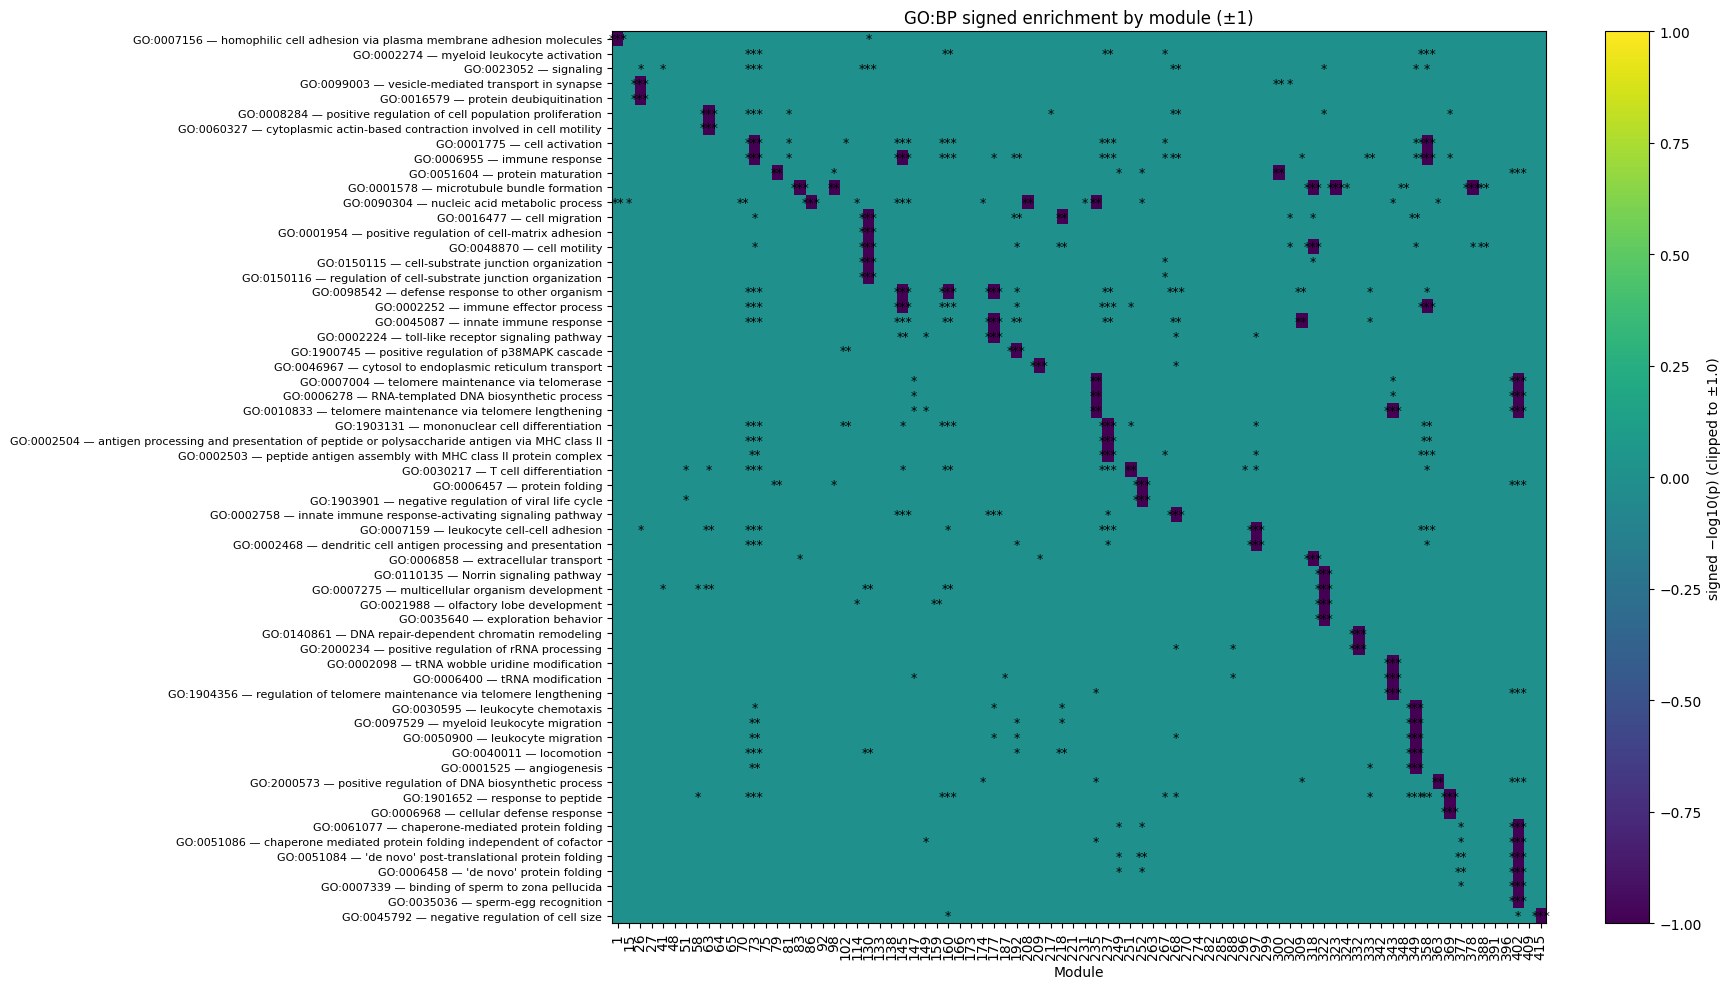

In [105]:
GO_PMAT = "/Users/edeneldar/CoExpression_ReProduction/go_pmat_rosmap_full.tsv"
GO_BP   = "/Users/edeneldar/CoExpression_ReProduction/go_bp_tab_rosmap_full.csv"
GO_CC   = "/Users/edeneldar/CoExpression_ReProduction/go_cc_tab_rosmap_full.csv"
GO_MF   = "/Users/edeneldar/CoExpression_ReProduction/go_mf_tab_rosmap_full.csv"
MODULES = "/Users/edeneldar/Library/CloudStorage/GoogleDrive-edenede2@gmail.com/Shared drives/is-SomekhLab/inter_tissue_coexpression/proccessed_data/ROSMAP_full_outputs/xwgcna_rosmap_autobeta_run4_Cluster_details.tsv"  # או run4 אצלך

signed_df_bp, measure_df_bp, stars_df_bp = build_go_bp_signed_matrix(
    go_pmat_tsv=GO_PMAT,
    go_bp_csv=GO_BP,
    modules_details=MODULES,
    clean_TS=True,
    selection="global_top",   # או "per_module"
    K_GLOBAL=60, N_PER_MODULE=4, P_THRESH=0.05,
    sig_measure="p",          # או "enrichmentP"/"BonferoniP" אם קיימים ב-BP
    cap=1.0
)

# ציור עם הפונקציה שכבר יש לך
fig = plot_signed_heatmap_with_stars(
    signed_df_bp, stars_df=stars_df_bp, cap=1.0,
    title="GO:BP signed enrichment by module (±1)"
)
plt.savefig("go_signed_heatmap_full_top_global.png", dpi=220, bbox_inches='tight')
plt.show()


Index(['Cluster ID', 'Cluster Size', 'Cluster Type', 'Cluster Tissues', 'AC',
       'MF', 'PCG', 'Dominant Tissue'],
      dtype='object')


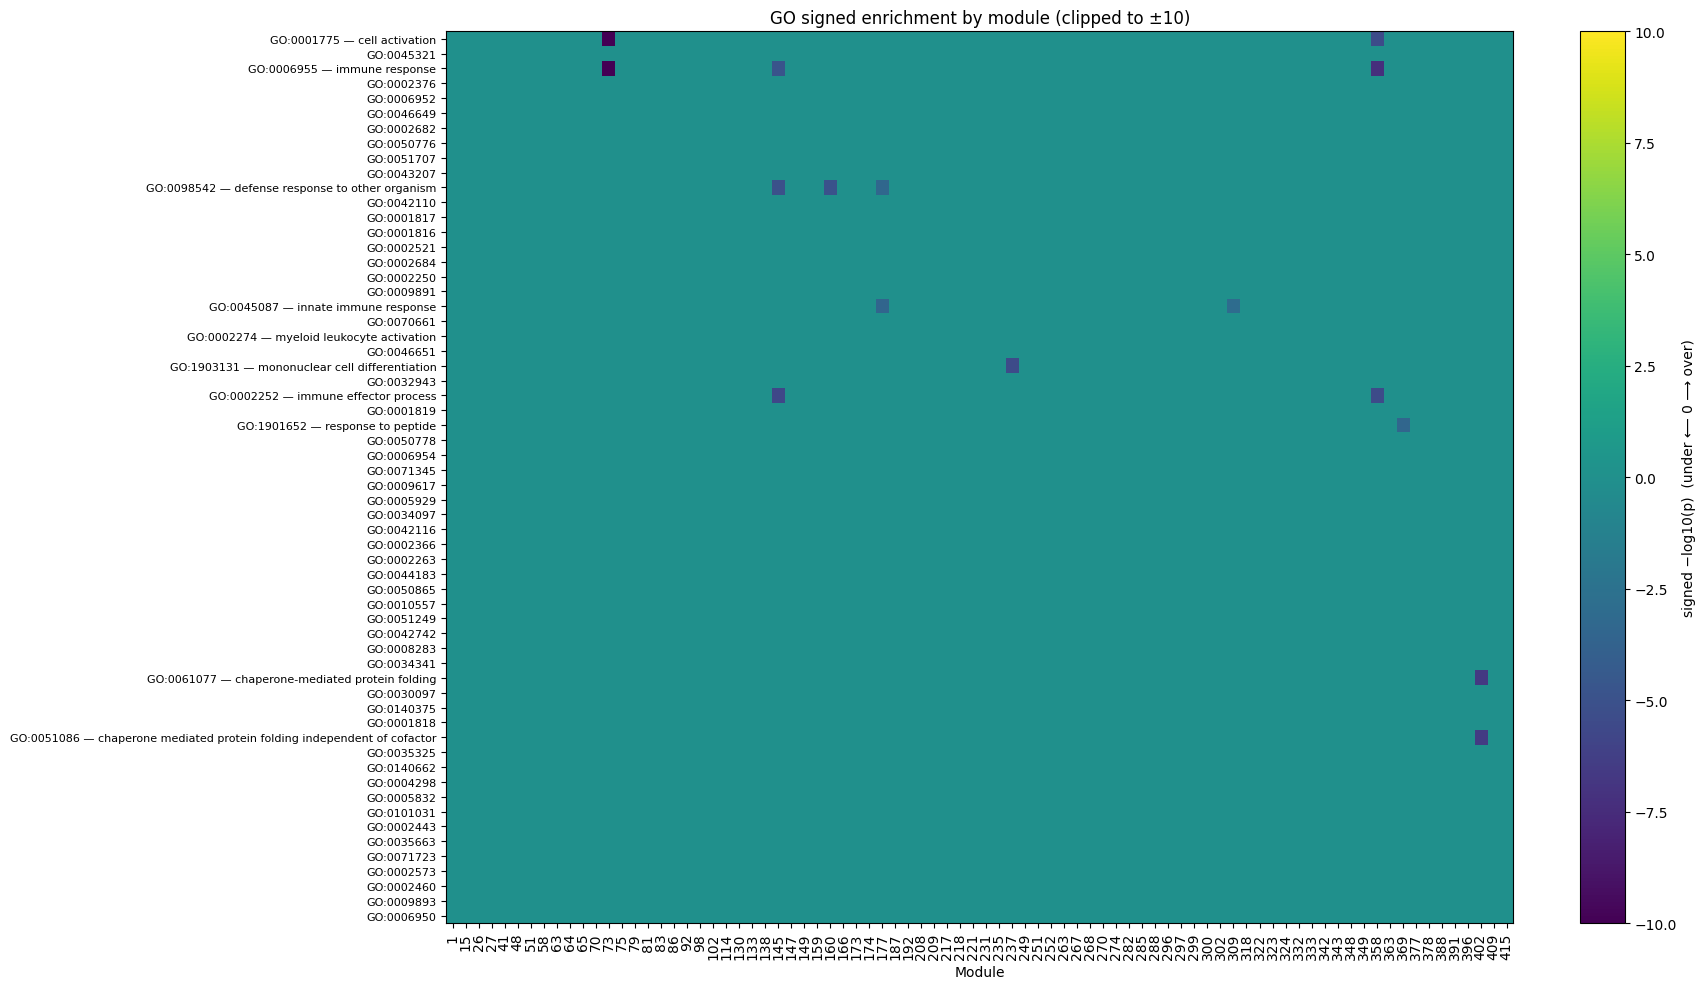

Saved: plots_signed_heatmaps/go_signed_neglog10p_selected_matrix.csv plots_signed_heatmaps/go_signed_neglog10p_heatmap.png


In [36]:
mat_T_go, y_go = build_go_signed_matrix(
    go_pmat_tsv=GO_PMAT_TSV,
    go_bp_csv=GO_BP_CSV, go_cc_csv=GO_CC_CSV, go_mf_csv=GO_MF_CSV,
    cap=10.0,
    selection="global_top",  # או "per_module"
    K_GLOBAL=60,
    N_PER_MODULE=4, P_THRESH=0.05,
    clean_TS=True
)

# שמירת CSV + פלוט
csv_go = OUT_DIR / "go_signed_neglog10p_selected_matrix.csv"
png_go = OUT_DIR / "go_signed_neglog10p_heatmap.png"
mat_T_go.to_csv(csv_go)
_ = plot_signed_heatmap(mat_T_go, "GO signed enrichment by module (clipped to ±10)", png_go, cap=10.0, ylabels=y_go)

print("Saved:", csv_go, png_go)


In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def build_kegg_signed_matrix(
    kegg_long_csv,
    modules_details=None,        
    clean_TS=True,             
    cap=10.0,                     
    selection="global_top",     
    K_GLOBAL=60,              
    N_PER_MODULE=4,           
    P_THRESH=0.05,           
    sig_measure="padj",          
    alpha_levels=((0.001,"***"), (0.01,"**"), (0.05,"*")),  
    byZ = True
):
    df = pd.read_csv(kegg_long_csv, engine="python", on_bad_lines="skip")

    # ['Cluster','Cluster.ID','category','subcategory','ID','Description','GeneRatio',
    #  'BgRatio','RichFactor','FoldEnrichment','zScore','pvalue','p.adjust','qvalue','geneID','Count']
    assert "Cluster" in df.columns and "Description" in df.columns, "Missing Cluster/Description columns"

    if clean_TS and modules_details is not None:
        md = pd.read_csv(modules_details, sep="\t")
        ct_ids = md.loc[md["Cluster Type"].eq("CT"), "Cluster ID"].astype(int)
        df = df[df["Cluster"].astype(int).isin(ct_ids)]

    df["Cluster"] = pd.to_numeric(df["Cluster"], errors="coerce").astype("Int64")
    df = df.dropna(subset=["Cluster"])
    df["Cluster"] = df["Cluster"].astype(int)
    df["Description"] = df["Description"].astype(str)

    df["p"]      = pd.to_numeric(df.get("pvalue"), errors="coerce")
    df["padj"]   = pd.to_numeric(df.get("p.adjust"), errors="coerce")
    df["qvalue"] = pd.to_numeric(df.get("qvalue"), errors="coerce")

    if byZ:
        sign_series = np.sign(pd.to_numeric(df["zScore"], errors="coerce"))
    else:
        sign_series = np.sign(pd.to_numeric(df["FoldEnrichment"], errors="coerce") - 1)
    df["sign"] = sign_series.fillna(0.0)

    agg = (df.groupby(["Description", "Cluster"], as_index=False)
             .agg(p=("p", "min"),
                  padj=("padj", "min"),
                  qvalue=("qvalue", "min"),
                  sign=("sign", "mean")))

    pmat_p     = agg.pivot(index="Description", columns="Cluster", values="p").astype(float)
    pmat_padj  = agg.pivot(index="Description", columns="Cluster", values="padj").astype(float)
    pmat_q     = agg.pivot(index="Description", columns="Cluster", values="qvalue").astype(float)
    smat       = agg.pivot(index="Description", columns="Cluster", values="sign").reindex_like(pmat_p)

    if sig_measure == "padj":
        measure_mat = pmat_padj
    elif sig_measure == "qvalue":
        measure_mat = pmat_q
    else:
        measure_mat = pmat_p 

    if selection == "global_top":
        chosen = measure_mat.min(axis=1).nsmallest(K_GLOBAL).index
    elif selection == "per_module":
        chosen_set = set()
        for c in measure_mat.columns:
            col = measure_mat[c]
            sig = col[col < P_THRESH].nsmallest(N_PER_MODULE)
            if sig.empty:
                sig = col.nsmallest(N_PER_MODULE)
            chosen_set.update(sig.index.tolist())
        chosen = list(chosen_set)
        if len(chosen) > K_GLOBAL:
            chosen = measure_mat.loc[chosen].min(axis=1).nsmallest(K_GLOBAL).index
    else:
        raise ValueError("selection must be 'global_top' or 'per_module'.")

    msub = measure_mat.loc[chosen]
    psub = pmat_p.loc[chosen]    
    ssub = smat.loc[chosen]

    EPS = np.nextafter(0, 1)
    neglog = -np.log10(np.clip(psub, EPS, 1.0))
    signed = np.clip(neglog, 0, cap) * np.sign(ssub.fillna(0.0))
    signed_df = pd.DataFrame(signed, index=msub.index, columns=msub.columns)

    abs_peak = signed_df.abs().max(axis=1)
    peak_mod = signed_df.abs().idxmax(axis=1)
    signed_df["__peak_mod__"] = peak_mod
    signed_df["__peak_val__"] = abs_peak
    signed_df = signed_df.sort_values(by=["__peak_mod__", "__peak_val__"],
                                      ascending=[True, False]) \
                         .drop(columns=["__peak_mod__", "__peak_val__"])

    measure_df = msub.loc[signed_df.index, signed_df.columns]

    def _stars_for_value(p):
        if pd.isna(p):
            return ""
        for thr, sym in alpha_levels:
            if p < thr:
                return sym
        return ""

    stars_df = measure_df.applymap(_stars_for_value)

    return signed_df, measure_df, stars_df  


def plot_signed_heatmap_with_stars(signed_df, stars_df=None, cap=10.0, title="KEGG signed enrichment"):
    fig, ax = plt.subplots(figsize=(18, 10))
    im = ax.imshow(signed_df.values, aspect="auto", vmin=-cap, vmax=cap)
    cb = fig.colorbar(im, ax=ax, label=f"signed −log10(p) (clipped to ±{cap})")

    ax.set_yticks(range(signed_df.shape[0])); ax.set_yticklabels(signed_df.index, fontsize=8)
    ax.set_xticks(range(signed_df.shape[1])); ax.set_xticklabels(signed_df.columns.astype(str), rotation=90)
    ax.set_xlabel("Module"); ax.set_title(title)

    if stars_df is not None:
        for i, term in enumerate(signed_df.index):
            for j, mod in enumerate(signed_df.columns):
                s = stars_df.loc[term, mod]
                if s:
                    ax.text(j, i, s, ha="center", va="center", fontsize=9, color="black")

    fig.tight_layout()
    return fig


/var/folders/5g/7gzv8rg14tv7prkqk0v2f3280000gn/T/ipykernel_8914/1338242533.py:105: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



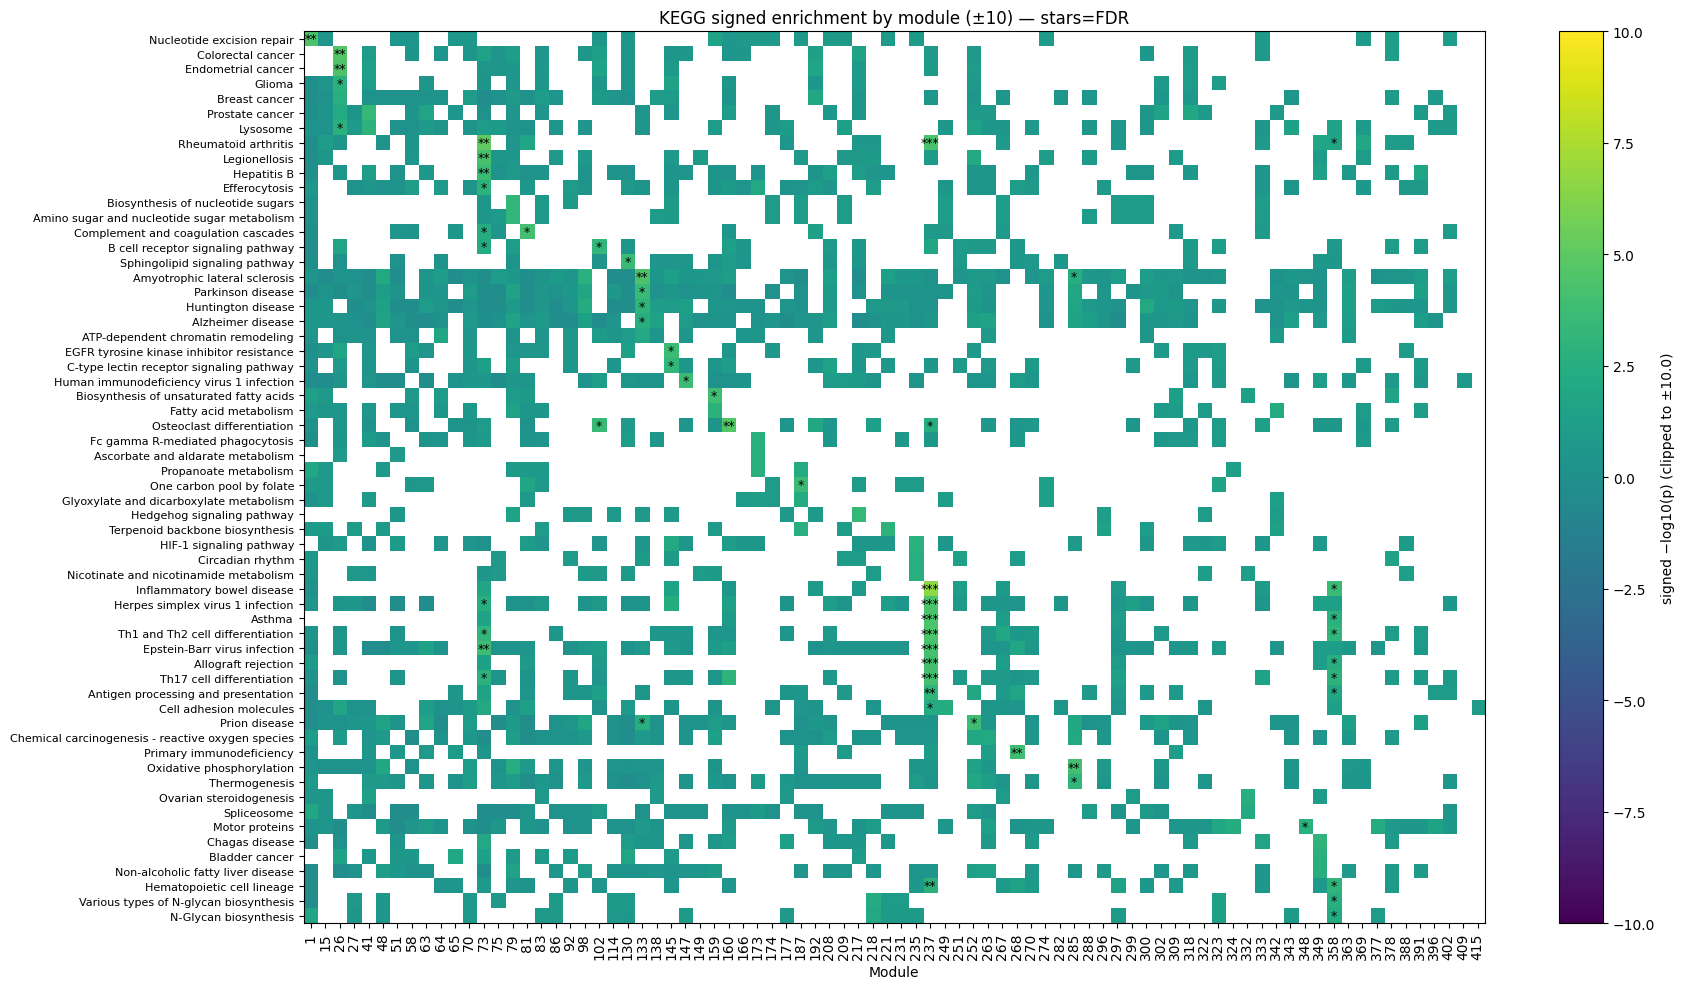

In [73]:

signed_df, measure_df, stars_df = build_kegg_signed_matrix(
    kegg_long_csv=KEGG_LONG_CSV,
    modules_details=MODULES_DETAILS,
    clean_TS=True,
    selection="per_module",
    K_GLOBAL=60, N_PER_MODULE=4, P_THRESH=0.05,
    sig_measure="padj",      
    alpha_levels=((0.001,"***"), (0.01,"**"), (0.05,"*")),
    cap=10.0
)

fig = plot_signed_heatmap_with_stars(
    signed_df, stars_df=stars_df, cap=10.0,
    title="KEGG signed enrichment by module (±10) — stars=FDR"
)
plt.savefig("kegg_signed_heatmap_full_per_module.png")
plt.show()